## Let's Clean some Data! 

In [74]:
import pandas as pd
import numpy as np

In [75]:
# Provide just the filename since it's in the same folder
filepath = "Resources/attacks.csv"

# read the CSV file
raw_df = pd.read_csv(filepath, encoding='latin1')

In [76]:
raw_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-18,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,9-Jun-18,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,8-Jun-18,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,4-Jun-18,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [77]:
# change case number to index

In [78]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6302 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [79]:
raw_df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [80]:
# rename fatal 

In [81]:
raw_df.columns = raw_df.columns.str.strip()
raw_df.columns = [x.lower().replace(" ", "_") for x in raw_df.columns]


In [82]:
raw_df.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [83]:
# drop unnessary columns
cols = ['date', 'year', 'type', 'country', 'area', 'location', 'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time', 'species']
df = raw_df.loc[:, cols]
df.head()

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species
0,25-Jun-18,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,9-Jun-18,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,8-Jun-18,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,4-Jun-18,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6302 non-null   object 
 1   year         6300 non-null   float64
 2   type         6298 non-null   object 
 3   country      6252 non-null   object 
 4   area         5847 non-null   object 
 5   location     5762 non-null   object 
 6   activity     5758 non-null   object 
 7   name         6092 non-null   object 
 8   sex          5737 non-null   object 
 9   age          3471 non-null   object 
 10  injury       6274 non-null   object 
 11  fatal_(y/n)  5763 non-null   object 
 12  time         2948 non-null   object 
 13  species      3464 non-null   object 
dtypes: float64(1), object(13)
memory usage: 2.7+ MB


In [85]:
# see what values are in the 'sex' series and start to clean column
df["sex"].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [86]:
# clean column 'sex'
# create a mask
sex_check = df.loc[df["sex"].isin(["nan", "lli", "N", "."])]

# print the rows there are in to view data
# print(sex_check) # with only 4 rows of data - feel safe to delete
df = df.drop(sex_check.index)

# now look at the 'M ' and change to standard 'M'
replace = {"M ": "M"}

# replace
df["sex"] = df["sex"].replace(replace)

# take a look after cleaning sex column -  should be M, F and nan
df.sex.unique()

array(['F', 'M', nan], dtype=object)

In [87]:
df.type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [88]:
# change to provoked and unprovoked

# clean column 'type'
# create a mask
type_check = df.loc[df["type"].isin(["Boatomg"])]

# print the rows there are in to view data
print(type_check) # shows just 1 row

# change 'Boatomg' to and 'Boat' to 'Boating'to condense data 
type_replace = {"Boatomg": "Boating", "Boat": "Boating"}

# replace
df["type"] = df.type.replace(type_replace)

# check unique valuse in type
df.type.unique()

          date    year     type      country          area  location activity  \
1152  1-Mar-09  2009.0  Boatomg  NEW ZEALAND  North Island  Taranaki  Fishing   

                                                 name sex  age  \
1152  boat, occupants: Boyd Rutherford & Hamish Roper   M  NaN   

                                           injury fatal_(y/n) time species  
1152  No injury to occupants, shark bit propeller           N  NaN     NaN  


array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan], dtype=object)

In [89]:
df["fatal_(y/n)"].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [90]:
# clean column 'fatal'
# create a mask
fatal_check = df.loc[df["fatal_(y/n)"].isin(["M", "2017"])]

# print the rows there are in to view data
print(fatal_check) # with only 2 rows of data - feel safe to delete
df = df.drop(fatal_check.index)

# take ' N ' 'N ' and 'y ' and fix typos
fatal_replace = {" N": "N", "N ": "N", "y": "Y"}

# replace
df["fatal_(y/n)"] = df["fatal_(y/n)"].replace(fatal_replace)

# take a look after cleaning sex column -  should be M, F and nan
df["fatal_(y/n)"].unique()

          date    year      type           country      area      location  \
285  18-Apr-16  2016.0  Provoked  FRENCH POLYNESIA  Tuamotos  Makemo Atoll   
786  10-Jun-12  2012.0  Provoked             ITALY  Sardinia      Muravera   

                                            activity          name sex age  \
285                                     Spearfishing   Hoata Iotua   M  22   
786  Attempting to rescue an injured & beached shark  Giorgio Zara   M  57   

                                                injury fatal_(y/n)     time  \
285  Laceration to knee by speared shark PROVOKED I...           M  Morning   
786           Lower left leg injured PROVOKED ACCIDENT        2017  Morning   

                  species  
285  Grey reef shark, 2 m  
786      Blue shark, 2.5m  


array(['N', 'Y', nan, 'UNKNOWN'], dtype=object)

In [91]:
df.year.unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [92]:
print(df.year.dtype)

float64


In [93]:
# clean column 'year'
# create a mask
year_check = df.loc[df["year"].isin([500, 77, 5])]

# print the rows there are in to view data
print(year_check) # shows just 3 rows feel safe to remove
df = df.drop(year_check.index)

# change the '0' years to nan to better represent non values
df.year = df.year.replace(0, np.nan)

df.year.unique()

                date   year        type    country             area location  \
6174  Circa 500 A.D.  500.0  Unprovoked     MEXICO              NaN      NaN   
6175        77  A.D.   77.0  Unprovoked        NaN       Ionian Sea      NaN   
6176      Ca. 5 A.D.    5.0  Unprovoked  AUSTRALIA  New South Wales    Bondi   

           activity   name sex  age  \
6174            NaN   male   M  NaN   
6175  Sponge diving  males   M  NaN   
6176            NaN   male   M  NaN   

                                                 injury fatal_(y/n) time  \
6174                                       Foot severed           N  NaN   
6175                                              FATAL           Y  NaN   
6176  Aboriginal rock carving depicts man being atta...           N  NaN   

     species  
6174     NaN  
6175     NaN  
6176     NaN  


array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [94]:
# Convert 'year' column to string
df['year'] = df['year'].astype(str)

# Remove decimal points from each string in the 'year' column
df['year'] = df['year'].apply(lambda x: x.split('.')[0])

# Display the DataFrame to verify the changes
df.year.unique

<bound method Series.unique of 0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
25718     nan
25719     nan
25720     nan
25721     nan
25722     nan
Name: year, Length: 25714, dtype: object>

In [95]:
# standardize column 'date'
# get rid of any words added to the date
df.date = df.date.astype(str)
df.loc[df["date"].str.startswith("Reported "), "date"] = df.date.str.replace("Reported ", "")

# standardize dates
df.date = pd.to_datetime(df.date, errors="coerce")
df.head(20)

C:\Users\newel\AppData\Local\Temp\ipykernel_19792\2743312903.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.date = pd.to_datetime(df.date, errors="coerce")


,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species
0,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
5,2018-06-03,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN
6,2018-06-03,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark
7,2018-05-27,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'"
8,2018-05-26,2018,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'"
9,2018-05-26,2018,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN


In [96]:
df.head()

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species
0,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [97]:
df.columns

Index(['date', 'year', 'type', 'country', 'area', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time', 'species'],
      dtype='object')

In [98]:
# take a look at value counts of activity to see the differnt categories
df.activity.value_counts()

activity
Surfing                                   970
Swimming                                  869
Fishing                                   430
Spearfishing                              332
Bathing                                   162
                                         ... 
Leaving the water                           1
Playing with a frisbee in the shallows      1
Sinking of the ferryboat Dumaguete          1
Wreck of the Storm King                     1
Wreck of  large double sailing canoe        1
Name: count, Length: 1530, dtype: int64

In [99]:
# change any individual activities into 'other' 
unique_activity = df.activity.value_counts()[df.activity.value_counts() == 1].index.tolist()
df.loc[df.activity.isin(unique_activity), "activity"] = "Other"

# create key words to search for to simplify activity values
activity_key_dict = {
    "Surf": "Surfing",
    "board": "Surfing",
    "Swim": "Swimming",
    "Treading": "Swimming",
    "Fish": "Fishing",
    "Float": "Floating",
    "Kite": "Kitboarding",
    "Disaster": "Accident",
    "drifted": "Accident",
    "overboard": "Accident",
    "capsized": "Accident",
    "sank": "Accident",
    "wreck": "Accident",
    "crash": "Accident",
    "sunk": "Accident",
    "Navy": "Accident",
    "fell": "Accident",
    "sharks": "Handling",
    "shark": "Handling",
    "diving": "Diving"
}
# fill any null values
df["activity"] = df["activity"].fillna("")

# apply all search keys to values in activites to sort unique vaules into categories for plotting
for search_key, activity in activity_key_dict.items():
    contains_search_key = df.activity.str.contains(search_key, case=False)
    df.loc[contains_search_key, "activity"] = activity




In [100]:
df.activity.value_counts()

activity
                                19963
Surfing                          1329
Other                            1313
Swimming                          978
Fishing                           925
                                ...  
Standing in waist-deep water        2
Beach seine netting                 2
Cruising                            2
Sitting in shallows                 2
Bathing in river                    2
Name: count, Length: 62, dtype: int64

In [101]:
df.activity.unique()

array(['Paddling', 'Standing', 'Surfing', 'Diving', 'Swimming', 'Fishing',
       'Walking', 'Handling', 'Other', 'Wading', 'Snorkeling', '',
       'Kayaking', 'Canoeing', 'SUP', 'Floating', 'Accident',
       'Playing in the water', 'Playing', 'Sitting in the water',
       'Transatlantic Rowing', 'Rowing', 'Kayaking ', 'Sailing',
       'Bathing', 'Jet skiing', 'Washing his feet', 'Crabbing', 'Jumping',
       'Jumped into the water', 'Murder', 'Lifesaving drill',
       'Competing in the Woodvale Atlantic Rowing Race', 'Unknown',
       'Cruising', 'Splashing', 'Rowing ', 'Standing ', 'Boat',
       'Paddleskiing', 'Sitting in shallows', 'Clamming',
       'Beach seine netting', 'Dangling feet in the water',
       'Standing in waist-deep water', 'Sitting on gunwale of boat',
       'Escaping from Alacatraz', 'Washing', 'Splashing ', 'Ocean racing',
       'Collecting shells', 'Standing in knee-deep water', 'Boating',
       'Suicide', 'Bathing ', 'Sculling', 'Seine netting',
     

In [102]:
df.head()

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species
0,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [103]:
# show value counts of species 
df.species.value_counts()

species
White shark                                                                                                                      163
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   88
Tiger shark                                                                                                                       73
                                                                                                                                ... 
Bull shark, 2.3 m [7.5']                                                                                                           1
0.9 m  [3'] shark                                            

In [104]:
# change any individual activities into 'other' 
unknown_species = df.species.value_counts()[df.species.value_counts() == 1].index.tolist()
df.loc[df.species.isin(unknown_species), "species"] = "Unknown"
# make any blank entries unknown species
df["species"] = df["species"].fillna("Unknown")

# create key words to search for to simplify species values
species_key_dict = {
    "bull": "Bull Shark",
    "tiger": "Tiger Shark",
    "lemon": "Lemon Shark",
    "nurse": "Nurse Shark",
    "white": "Great White Shark",
    "wobbegong": "Wobbegong Shark",
    "reef": "Reef Shark",
    "Blacktip": "Blacktip Shark",
    "Hammerhead": "Hammerhead Shark",
    "Mako": "Mako Shark",
    "Zambesi": "Zambesi Shark",
    "Raggedtooth": "Raggedtooth Shark",
    "not confirmed": "Unidentified",
    "unconfirmed": "Unidentified",
    "Invalid": "Unidentified",
    "Bronze": "Bronze Whaler Shark"
}

# apply all search keys to values in activites to sort unique vaules into 
for search_key, species in species_key_dict.items():
    contains_search_key = df.species.str.contains(search_key, case=False)
    df.loc[contains_search_key, "species"] = species



In [105]:
df.species.value_counts()

species
Unknown                 23471
Great White Shark         401
Unidentified              385
Tiger Shark               170
Bull Shark                107
                        ...  
4.5' shark                  2
3.5 m [11.5'] shark         2
20 to 30kg shark            2
Whale shark                 2
Juvenile dusky shark        2
Name: count, Length: 143, dtype: int64

In [125]:
df.species.unique()

array(['Great White Shark', 'Unknown', '2 m shark', 'Tiger Shark',
       'Bull Shark', 'Reef Shark', 'Unidentified', 'Questionable',
       '3 m shark', "6' shark", 'Wobbegong Shark', '3.5 m shark',
       '1.8 m shark', 'Blacktip Shark', '2m shark', 'small shark',
       "8' shark", "5' shark", "4' to 5' shark", "5' to 6' shark",
       'Nurse Shark', 'Shark involvement questionable', "4' shark",
       'A small shark', '"A small shark"', 'Seven-gill shark', "3' shark",
       "9' shark", "10' shark", 'Lemon Shark', 'a small shark',
       "3' to 4' shark", 'Blue shark', 'Angel shark', "3' to 5' shark",
       'Mako Shark', 'Bronze Whaler Shark', 'No shark involvement',
       'Galapagos shark', 'juvenile shark', 'Hammerhead Shark',
       'Shark involvement not cofirmed', '5 m shark', '1.5 m shark',
       "2' shark", "12' to 14' shark", '1 m shark', "8' to 10' shark",
       "7' shark", 'Spinner shark', "4' to 6' shark", "6' to 8' shark",
       '1m shark', '7-gill shark', 'Salmon 

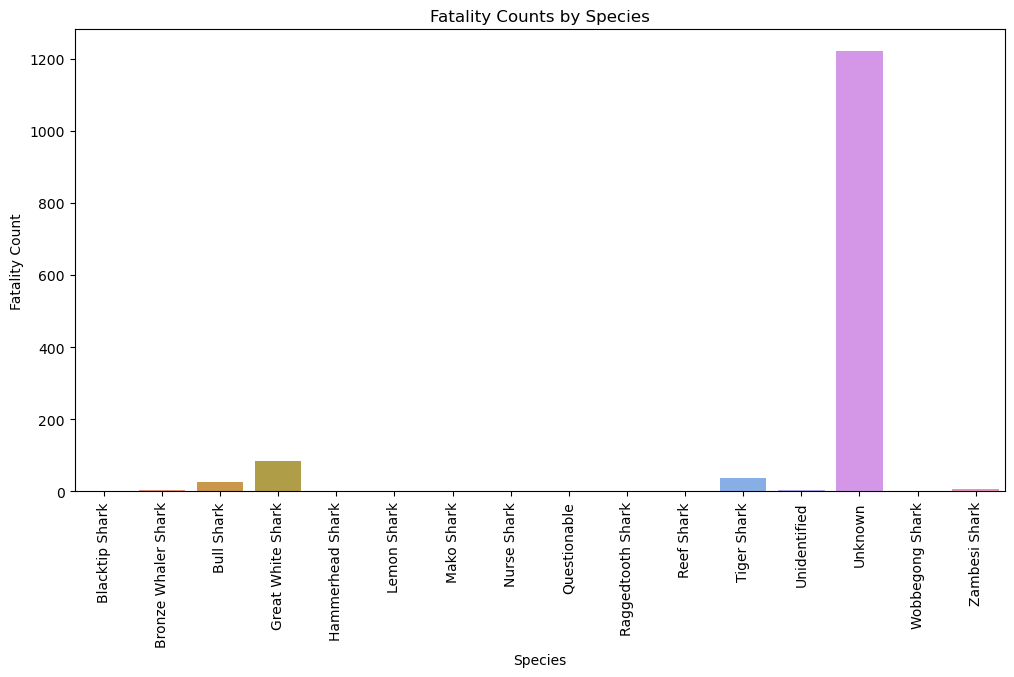

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'fatal_(y/n)' column to 1 for 'Y', 0 for everything else
df['fatality_count'] = df['fatal_(y/n)'].apply(lambda x: 1 if x == 'Y' else 0)

# Count fatalities by species
fatalities_by_species = df.groupby('species')['fatality_count'].sum().reset_index()

# Mapping dictionary to standardize shark species
species_mapping = {
    'Great White Shark': 'Great White Shark',
    'Unknown': 'Unknown',
    'Tiger Shark': 'Tiger Shark',
    'Bull Shark': 'Bull Shark',
    'Reef Shark': 'Reef Shark',
    'Unidentified': 'Unidentified',
    'Questionable': 'Questionable',
    'Wobbegong Shark': 'Wobbegong Shark',
    'Blacktip Shark': 'Blacktip Shark',
    'Nurse Shark': 'Nurse Shark',
    'Seven-gill shark': 'Seven-gill Shark',
    'Lemon Shark': 'Lemon Shark',
    'Blue shark': 'Blue Shark',
    'Angel shark': 'Angel Shark',
    'Mako Shark': 'Mako Shark',
    'Bronze Whaler Shark': 'Bronze Whaler Shark',
    'Galapagos shark': 'Galapagos Shark',
    'Hammerhead Shark': 'Hammerhead Shark',
    'Spinner shark': 'Spinner Shark',
    'Salmon shark': 'Salmon Shark',
    'Raggedtooth Shark': 'Raggedtooth Shark',
    'Zambesi Shark': 'Zambesi Shark',
    'Basking shark': 'Basking Shark',
    'Sand shark': 'Sand Shark',
    'Whale shark': 'Whale Shark',
    'Carpet shark': 'Carpet Shark',
    'Blue pointer': 'Blue Pointer',
    'Dusky shark': 'Dusky Shark',
    'Dog shark': 'Dog Shark'
    # Add more mappings as needed
}

# Apply the mapping to the 'species' column
df['species'] = df['species'].map(species_mapping)

# Fill NaN values in 'species' column with 'Unknown' (if needed)
df['species'] = df['species'].fillna('Unknown')

# Count fatalities by standardized species
fatalities_by_species = df.groupby('species')['fatality_count'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='species', y='fatality_count', data=fatalities_by_species)
plt.title('Fatality Counts by Species')
plt.xlabel('Species')
plt.ylabel('Fatality Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

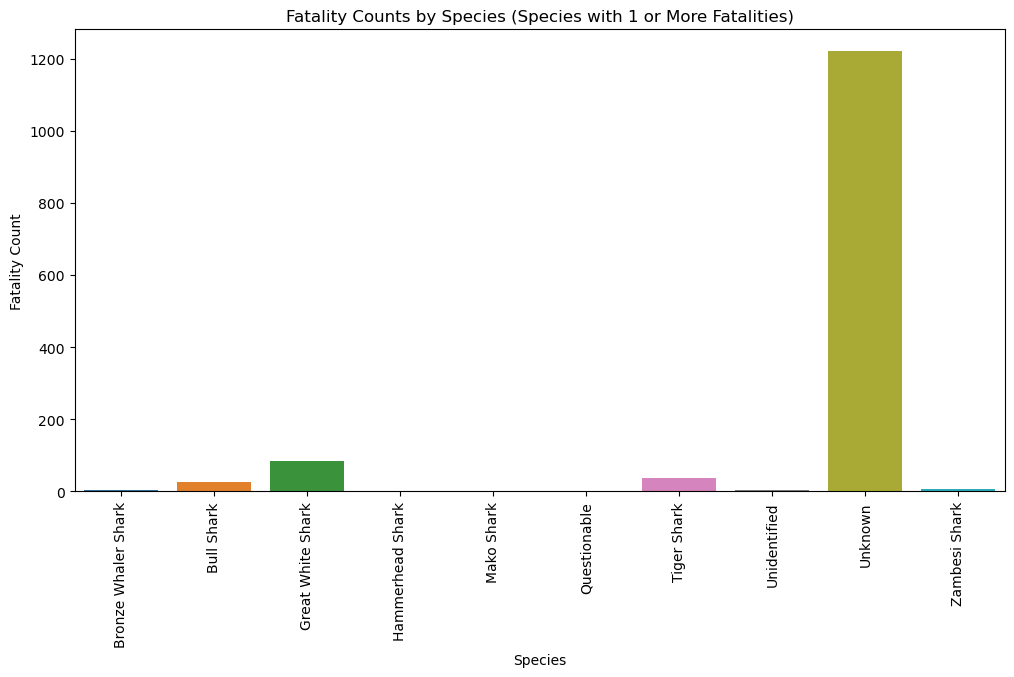

In [112]:
# Count fatalities by standardized species
fatalities_by_species = df.groupby('species')['fatality_count'].sum().reset_index()

# Filter species with one or more fatalities
fatalities_by_species = fatalities_by_species[fatalities_by_species['fatality_count'] >= 1]

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='species', y='fatality_count', data=fatalities_by_species)
plt.title('Fatality Counts by Species (Species with 1 or More Fatalities)')
plt.xlabel('Species')
plt.ylabel('Fatality Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

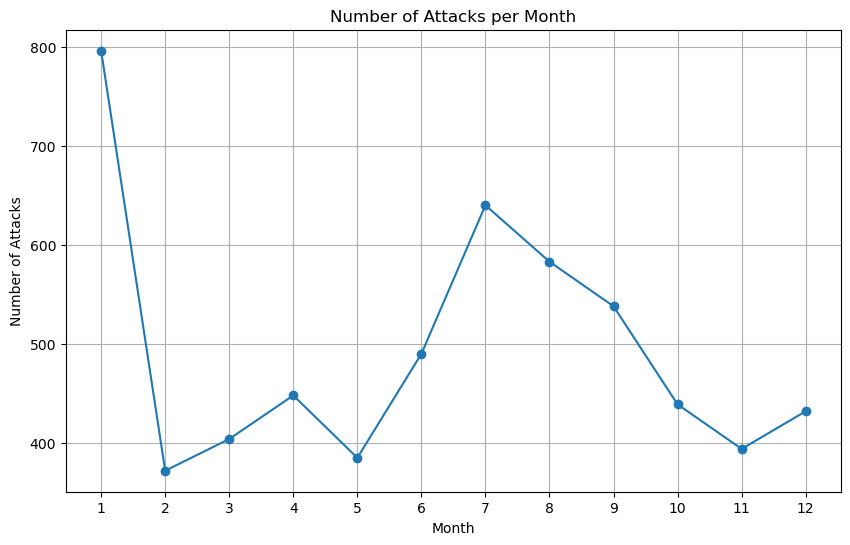

In [113]:
# Extract month from the 'date' column
df['month'] = df['date'].dt.month

# Count attacks per month
attacks_per_month = df['month'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(10, 6))
attacks_per_month.plot(marker='o', linestyle='-')
plt.title('Number of Attacks per Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(range(1, 13))  # Set ticks for each month
plt.grid(True)
plt.show()

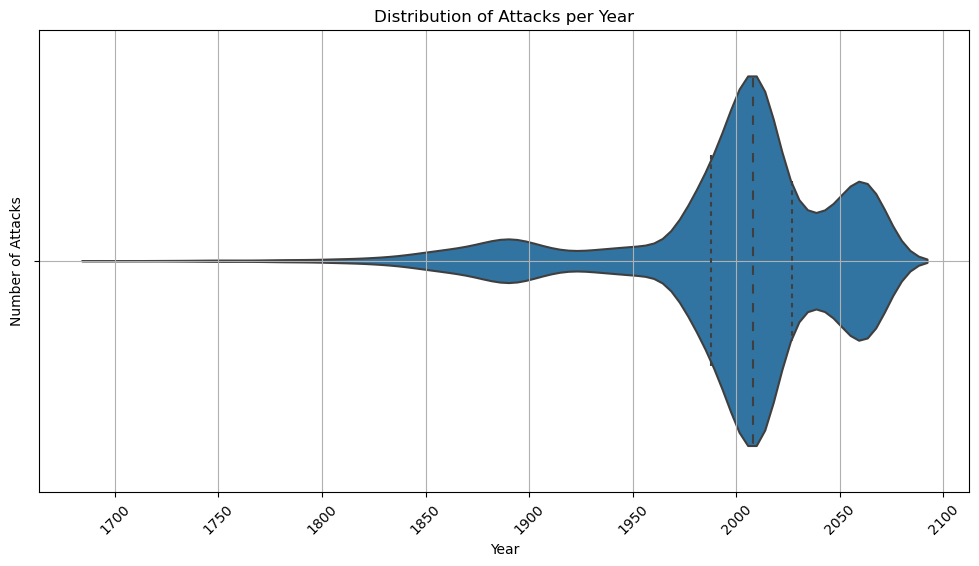

In [120]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year from the 'date' column
df['year'] = df['date'].dt.year

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='year', data=df, inner='quartile')  # Set inner parameter to quartile for quartiles to be drawn inside the violins
plt.title('Distribution of Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()